In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [52]:
bias = 100
X, y, coef = make_regression(100, n_features=1, bias=bias, coef=True, noise=10)

In [53]:
expected_theta = np.hstack([[bias], coef])

In [54]:
expected_theta

array([100.        ,  68.24029586])

In [55]:
X.shape

(100, 1)

In [56]:
X_update = np.hstack([np.ones((X.shape[0], 1)), X])

In [57]:
X_update.shape

(100, 2)

In [58]:
yh = np.dot(X_update, expected_theta.reshape(-1, 1))

In [59]:
y[0]

5.503842902825673

In [60]:
X_update[0]

array([ 1.        , -1.31373396])

In [61]:
expected_theta

array([100.        ,  68.24029586])

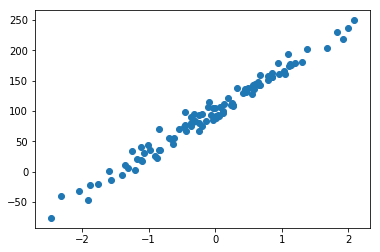

In [62]:
plt.scatter(X, y)

In [63]:
class LinearRegression:
    
    def __init__(self, lr, iters):
        self.lr = lr
        self.iters = iters
    
    def fit(self, X, y):
        self.X = np.hstack([np.ones((X.shape[0], 1)), X])
        self.y = y.reshape(-1, 1)
        
        self.theta = np.zeros([self.X.shape[1], 1])
        
        for i in range(self.iters):
            self.gradient_dec()
            
    def gradient_dec(self):
        d_theta = self.gradient()
        self.theta -= d_theta 
        
    def gradient(self):
        yh = self.hypothesis(self.X, self.theta)
        d_theta = np.mean((yh - self.y)*self.X*self.lr, axis=0).reshape(-1, 1)
        return d_theta
        
    def hypothesis(self, X, theta):
        return np.dot(X, theta)
    
    def predict(self, X):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        return self.hypothesis(X, self.theta).flatten()
        
        

In [64]:
model = LinearRegression(lr=.01, iters=1000)

In [65]:
model.fit(X, y)

In [66]:
yh = model.predict(X)

In [67]:
# plt.scatter(X, y, color="red", s=60)
# plt.scatter(X, yh, color="blue", s=6)

In [68]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [69]:
X, y = load_boston(return_X_y=True)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [71]:
model = LinearRegression(lr=.000001, iters=1000000)

In [72]:
model.fit(X_train, y_train)

In [73]:
model.theta

array([[ 0.27095611],
       [-0.11717693],
       [ 0.07043694],
       [ 0.04128488],
       [ 0.29691302],
       [ 0.1263488 ],
       [ 2.91766699],
       [ 0.04848164],
       [-0.34511729],
       [ 0.08626968],
       [-0.00356186],
       [ 0.11739256],
       [ 0.02353662],
       [-0.71407723]])

In [74]:
a1 = model.predict(X_test[:20])

In [75]:
y_test[:20]

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1])

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
model = LinearRegression()

In [78]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [79]:
a2 = model.predict(X_test[:20])

In [80]:
sum((y_test[:20] - a1)**2)

647.4591589827857

In [81]:
sum((y_test[:20] - a2)**2)

432.67117322801556